<a href="https://colab.research.google.com/github/Sak2320/business-analytics-portfolio/blob/main/Copy_of_Climate_Change_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 %%capture
 # Install relevant libraries
 !pip install geopandas folium

In [ ]:
 # Import libraries
 import pandas as pd
 import numpy as np
 import random
 import os
 from tqdm.notebook import tqdm
 import geopandas as gpd
 from shapely.geometry import Point
 import folium
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 pd.options.display.float_format = '{:.5f}'.format
 pd.options.display.max_rows = None
 %matplotlib inline
 import warnings
 warnings.filterwarnings('ignore')

In [ ]:
 # Set seed for reproducability
 SEED = 2023
 random.seed(SEED)
 np.random.seed(SEED)


In [ ]:
import pandas as pd



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving GlobalTemperatures.csv to GlobalTemperatures.csv
Saving TemperaturesByCountry.csv to TemperaturesByCountry.csv
Saving TemperaturesByMajorCity.csv to TemperaturesByMajorCity.csv
Saving TemperaturesByState.csv to TemperaturesByState.csv


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving GlobalLandTemperaturesByCity.csv to GlobalLandTemperaturesByCity.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import CSV files
global_temp = pd.read_csv('/content/GlobalTemperatures.csv')
country_temp = pd.read_csv('/content/TemperaturesByCountry.csv')
city_temp = pd.read_csv('/content/TemperaturesByMajorCity.csv')
state_temp = pd.read_csv('/content/TemperaturesByState.csv')
land_city_temp = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')


# **Basic Exploratory Data Analysis**

In [ ]:
print(global_temp.head())
print(country_temp.head())
print(city_temp.head())
print(state_temp.head())


           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                 

# **Global Temperature Trend Over Time**

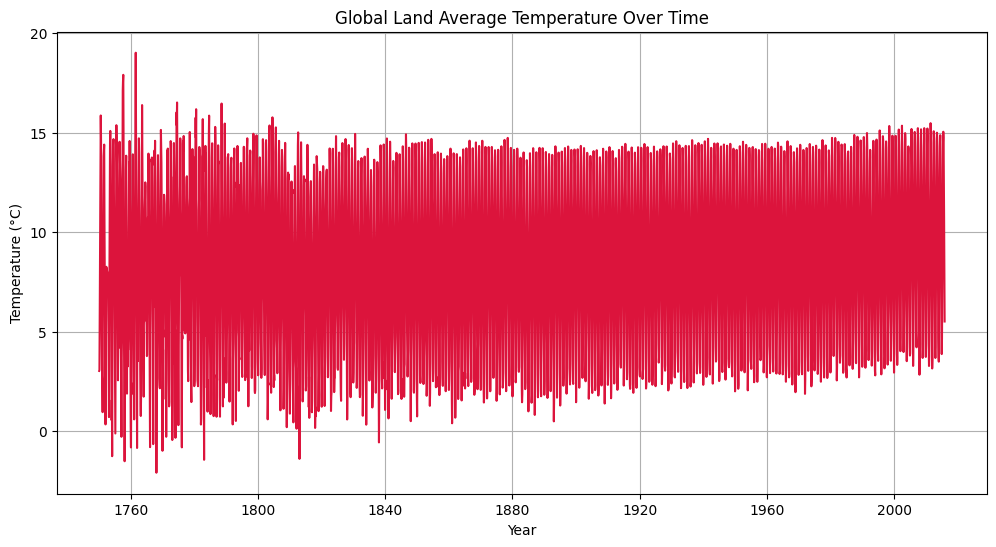

In [ ]:
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

plt.figure(figsize=(12,6))
sns.lineplot(data=global_temp, x='dt', y='LandAverageTemperature', color='crimson')
plt.title('Global Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


# **Top 10 Hottest Countries (Since 2000)**


<ipython-input-16-4c2a2b3b0900>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_country_temp.values, y=avg_country_temp.index, palette='Reds_r')


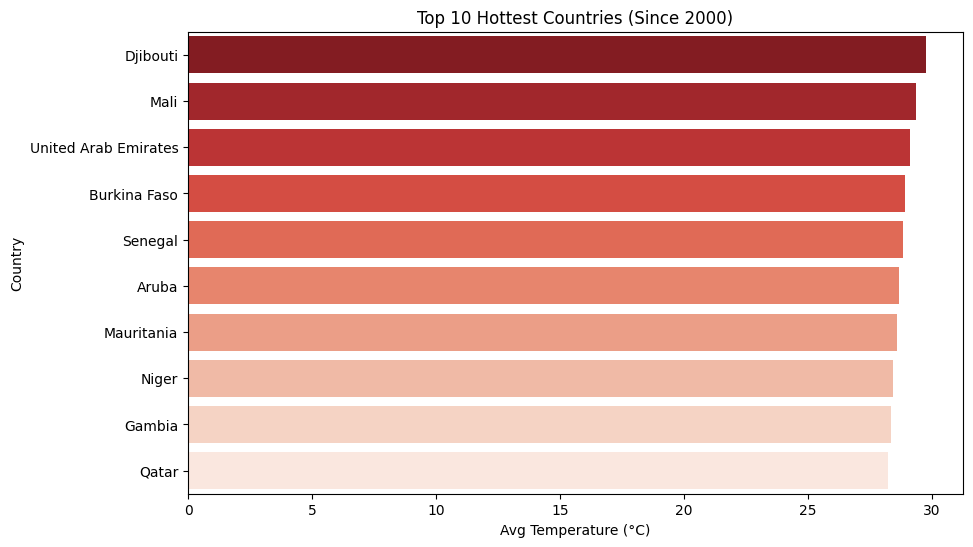

In [ ]:
country_temp['dt'] = pd.to_datetime(country_temp['dt'])
recent_data = country_temp[country_temp['dt'] >= '2000-01-01']
avg_country_temp = recent_data.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_country_temp.values, y=avg_country_temp.index, palette='Reds_r')
plt.title('Top 10 Hottest Countries (Since 2000)')
plt.xlabel('Avg Temperature (°C)')
plt.ylabel('Country')
plt.show()


# **Top 10 Cities with Highest Avg Temperature**

<ipython-input-17-8ef15255e8e0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_temp.values, y=city_avg_temp.index, palette='flare')


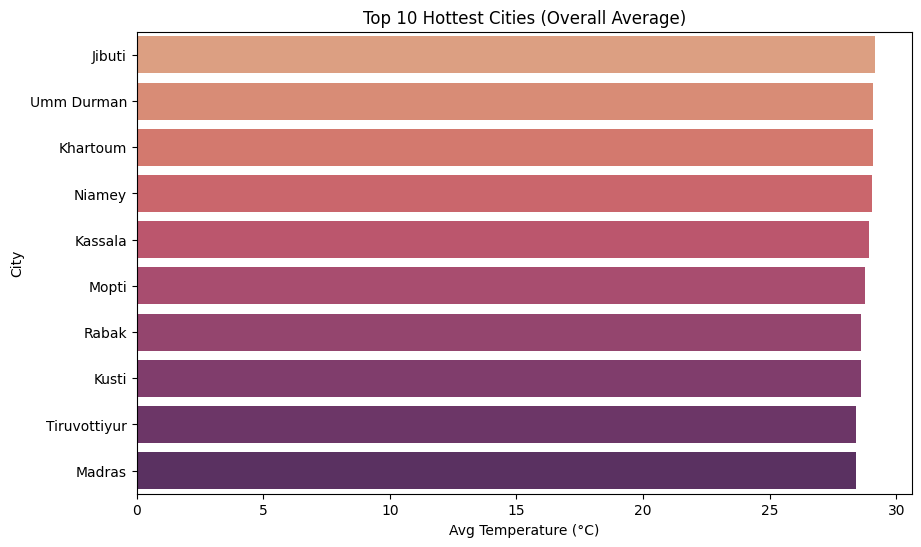

In [ ]:
land_city_temp['dt'] = pd.to_datetime(land_city_temp['dt'])
city_avg_temp = land_city_temp.groupby('City')['AverageTemperature'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_avg_temp.values, y=city_avg_temp.index, palette='flare')
plt.title('Top 10 Hottest Cities (Overall Average)')
plt.xlabel('Avg Temperature (°C)')
plt.ylabel('City')
plt.show()


# **Global Country Temperature Map**



In [ ]:
!pip install plotly


In [ ]:
import plotly.express as px

# Preprocess
country_temp['dt'] = pd.to_datetime(country_temp['dt'])
recent_temp = country_temp[country_temp['dt'] >= '2000-01-01']
country_avg = recent_temp.groupby('Country')['AverageTemperature'].mean().reset_index()

# Plot
fig = px.choropleth(country_avg,
                    locations='Country',
                    locationmode='country names',
                    color='AverageTemperature',
                    color_continuous_scale='thermal',
                    title='Average Land Temperature by Country (Since 2000)')
fig.show()


# **Seasonal Correlation**

In [ ]:
import pandas as pd

df = land_city_temp.copy()
df['dt'] = pd.to_datetime(df['dt'])
df['Month'] = df['dt'].dt.month

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)


In [ ]:
ny = df[df['City'] == 'New York']
ny = ny.dropna(subset=['AverageTemperature'])

# Group by Year and Season
ny['Year'] = ny['dt'].dt.year
seasonal_avg = ny.groupby(['Year', 'Season'])['AverageTemperature'].mean().unstack()


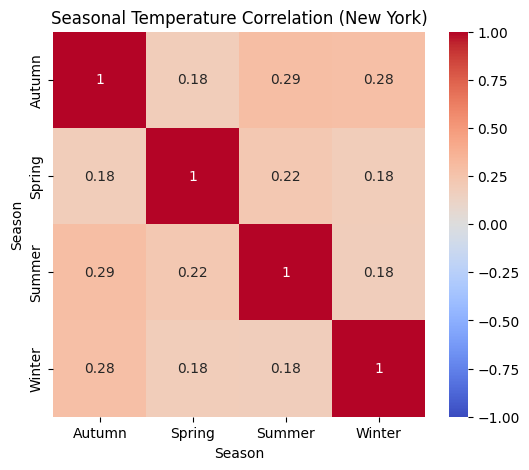

In [ ]:
# Correlation matrix between seasons
season_corr = seasonal_avg.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(season_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Seasonal Temperature Correlation (New York)')
plt.show()


# **Lag Correlation in Temperature Trends**

In [ ]:
# Use the cleaned temperature dataset
df = land_city_temp.copy()
df['dt'] = pd.to_datetime(df['dt'])

# Choose cities
cities = ['Delhi', 'New York']
temp = df[df['City'].isin(cities)]
temp = temp[['dt', 'City', 'AverageTemperature']].dropna()

# Pivot table: date as index, city names as columns
pivot = temp.pivot(index='dt', columns='City', values='AverageTemperature')
pivot = pivot.dropna()


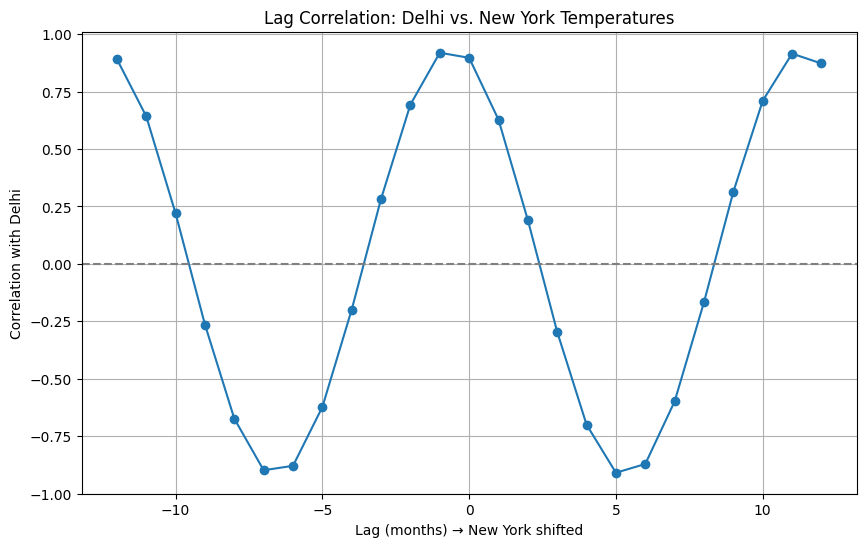

In [ ]:
import matplotlib.pyplot as plt

# Delhi vs. New York lag correlation
lags = range(-12, 13)  # +/- 12 months
corrs = []

for lag in lags:
    shifted = pivot['New York'].shift(lag)
    corr = pivot['Delhi'].corr(shifted)
    corrs.append(corr)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(lags, corrs, marker='o', linestyle='-')
plt.title('Lag Correlation: Delhi vs. New York Temperatures')
plt.xlabel('Lag (months) → New York shifted')
plt.ylabel('Correlation with Delhi')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


# **Anomaly Detection in Temperature Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ny_df = monthly_avg[monthly_avg['City'] == 'New York'][['ds', 'y']].copy()
ny_df = ny_df.sort_values('ds').dropna()
ny_df.set_index('ds', inplace=True)

# Rolling mean for smoothing
ny_df['rolling_mean'] = ny_df['y'].rolling(window=12, center=True).mean()
ny_df['z_score'] = (ny_df['y'] - ny_df['rolling_mean']) / ny_df['y'].std()


In [ ]:
threshold = 2.0  # You can adjust this
ny_df['anomaly'] = ny_df['z_score'].apply(lambda x: abs(x) > threshold)


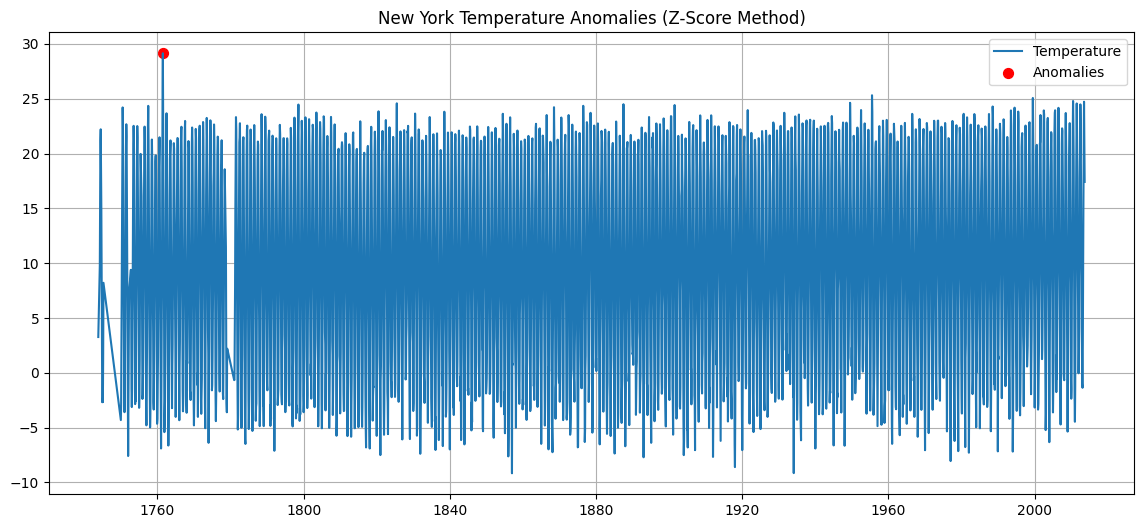

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(ny_df.index, ny_df['y'], label='Temperature')
plt.scatter(ny_df[ny_df['anomaly']].index, ny_df[ny_df['anomaly']]['y'],
            color='red', label='Anomalies', s=50)
plt.title("New York Temperature Anomalies (Z-Score Method)")
plt.legend()
plt.grid(True)
plt.show()


# **Temperature Scenario Forecasting**

Dataset loaded successfully.

Processed Data Head:
        Year  Temperature  Year_Numeric
0 1850-12-31    14.867167          1850
1 1851-12-31    14.991833          1851
2 1852-12-31    15.006500          1852
3 1853-12-31    14.955167          1853
4 1854-12-31    14.991000          1854

Processed Data Tail:
          Year  Temperature  Year_Numeric
161 2011-12-31    15.769500          2011
162 2012-12-31    15.802333          2012
163 2013-12-31    15.854417          2013
164 2014-12-31    15.913000          2014
165 2015-12-31    16.058583          2015


<ipython-input-42-e45e5c563dbd>:30: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.




Linear Regression Model Coefficients:
Intercept: 4.8736
Slope (Temperature change per year): 0.0054


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



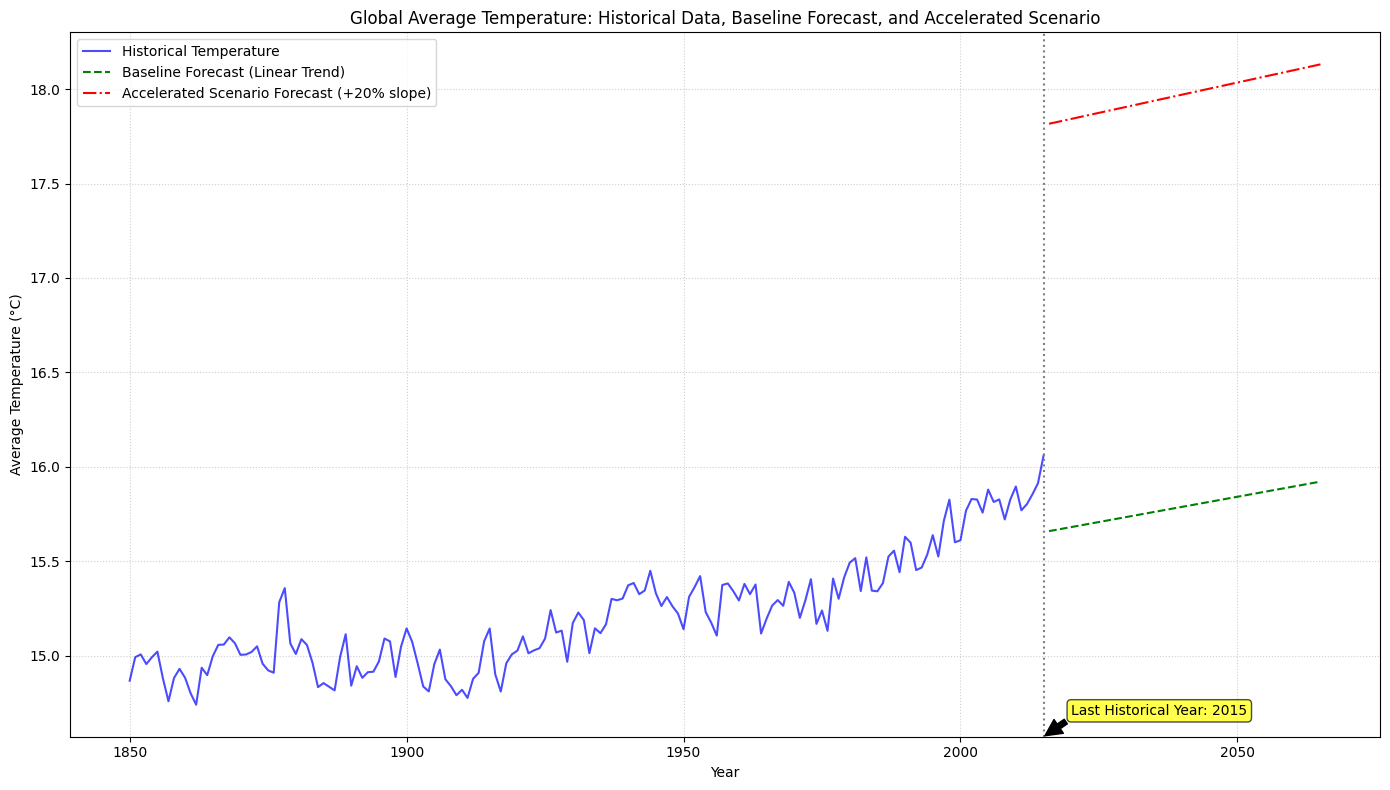


Scenario forecasting complete. The plot shows the historical trend, a baseline linear forecast, and a 'what if' scenario where the temperature increase accelerates.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import timedelta

# --- 1. Load the Dataset ---
# Assuming 'GlobalTemperatures.csv' is in your Colab environment or mounted Google Drive
# If you uploaded it directly, it should be accessible.
try:
    df = pd.read_csv('GlobalTemperatures.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'GlobalTemperatures.csv' not found. Please ensure it's uploaded or mounted.")
    # Exit or handle the error appropriately if the file isn't found
    exit()

# --- 2. Data Preprocessing ---
# Convert 'dt' column to datetime objects
df['dt'] = pd.to_datetime(df['dt'])

# Set 'dt' as the index
df.set_index('dt', inplace=True)

# Drop rows with missing values (e.g., in 'LandAndOceanAverageTemperature')
df.dropna(subset=['LandAndOceanAverageTemperature'], inplace=True)

# Resample to yearly average temperature
# We'll use 'LandAndOceanAverageTemperature' for global trend
yearly_temp = df['LandAndOceanAverageTemperature'].resample('Y').mean()

# Convert yearly_temp Series to a DataFrame for easier handling with sklearn
yearly_temp_df = yearly_temp.reset_index()
yearly_temp_df.columns = ['Year', 'Temperature']
yearly_temp_df['Year_Numeric'] = yearly_temp_df['Year'].apply(lambda x: x.year)

print("\nProcessed Data Head:")
print(yearly_temp_df.head())
print("\nProcessed Data Tail:")
print(yearly_temp_df.tail())

# --- 3. Prepare Data for Modeling ---
# Use years as the independent variable (X) and temperature as the dependent variable (y)
X = yearly_temp_df[['Year_Numeric']]
y = yearly_temp_df['Temperature']

# --- 4. Fit a Linear Regression Model ---
# We'll use a simple linear model to capture the baseline trend
model = LinearRegression()
model.fit(X, y)

print(f"\nLinear Regression Model Coefficients:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Slope (Temperature change per year): {model.coef_[0]:.4f}")

# --- 5. Generate Forecasts ---
# Define the forecasting period (e.g., next 50 years from the last available year)
last_year = yearly_temp_df['Year_Numeric'].max()
future_years = np.arange(last_year + 1, last_year + 51).reshape(-1, 1) # Forecast for next 50 years

# Baseline Forecast
baseline_forecast = model.predict(future_years)

# Accelerated Scenario Forecast
# Option 1: Increase the slope for the future
# Let's say we want the acceleration to be 20% faster than the historical trend
acceleration_factor = 1.2 # 20% faster
accelerated_slope = model.coef_[0] * acceleration_factor
accelerated_intercept = model.intercept_ # Keep intercept same for simplicity

accelerated_forecast = accelerated_intercept + accelerated_slope * future_years.flatten()

# Option 2: Add an increasing offset to the baseline forecast
# This creates a non-linear acceleration over time
# accelerated_forecast = baseline_forecast + np.linspace(0, 1.5, len(future_years)) # Adds up to 1.5 degree C over 50 years

# --- 6. Visualization ---
plt.figure(figsize=(14, 8))

# Plot historical data
plt.plot(yearly_temp_df['Year_Numeric'], yearly_temp_df['Temperature'], label='Historical Temperature', color='blue', alpha=0.7)

# Plot baseline forecast
plt.plot(future_years, baseline_forecast, label='Baseline Forecast (Linear Trend)', color='green', linestyle='--')

# Plot accelerated scenario forecast
plt.plot(future_years, accelerated_forecast, label='Accelerated Scenario Forecast (+20% slope)', color='red', linestyle='-.')

plt.title('Global Average Temperature: Historical Data, Baseline Forecast, and Accelerated Scenario')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.axvline(x=last_year, color='gray', linestyle=':', label='End of Historical Data')
plt.annotate(f'Last Historical Year: {last_year}', xy=(last_year, plt.ylim()[0]), xytext=(last_year + 5, plt.ylim()[0] + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="k", lw=1, alpha=0.7),
             ha='left', va='bottom')
plt.tight_layout()
plt.show()

print("\nScenario forecasting complete. The plot shows the historical trend, a baseline linear forecast, and a 'what if' scenario where the temperature increase accelerates.")


# **Global Temperature Time Series Analysis**

Dataset loaded successfully.

Processed Yearly Data Head:
        Year  Temperature  Year_Numeric
0 1850-12-31    14.867167          1850
1 1851-12-31    14.991833          1851
2 1852-12-31    15.006500          1852
3 1853-12-31    14.955167          1853
4 1854-12-31    14.991000          1854

Processed Yearly Data Tail:
          Year  Temperature  Year_Numeric
161 2011-12-31    15.769500          2011
162 2012-12-31    15.802333          2012
163 2013-12-31    15.854417          2013
164 2014-12-31    15.913000          2014
165 2015-12-31    16.058583          2015


<ipython-input-43-b2623a882196>:31: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



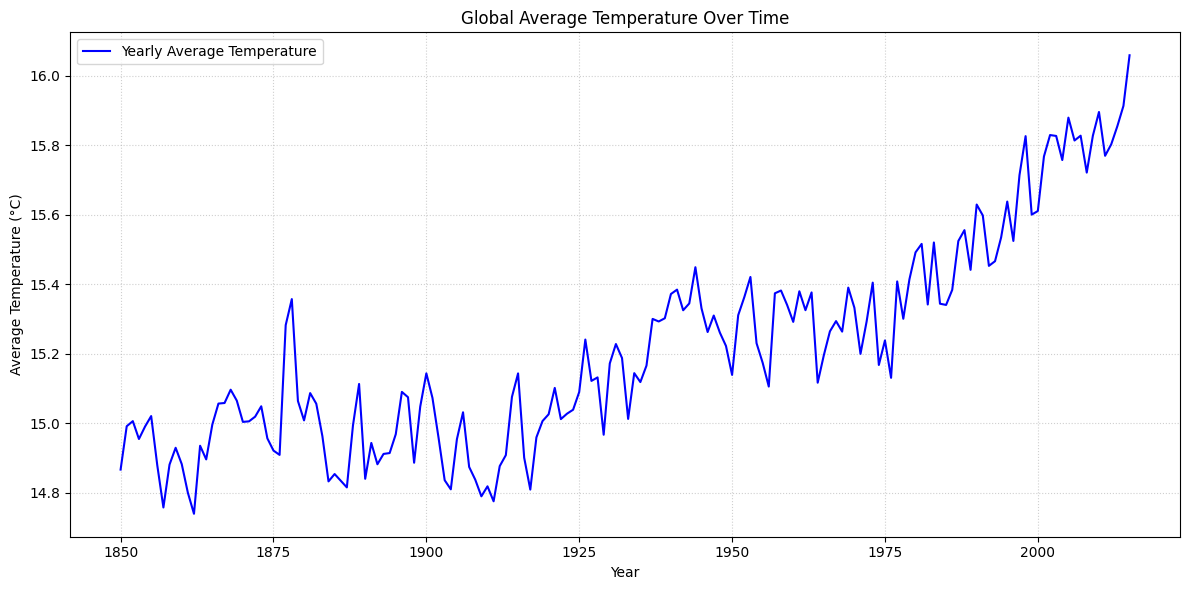


Raw Time Series Plot Generated.


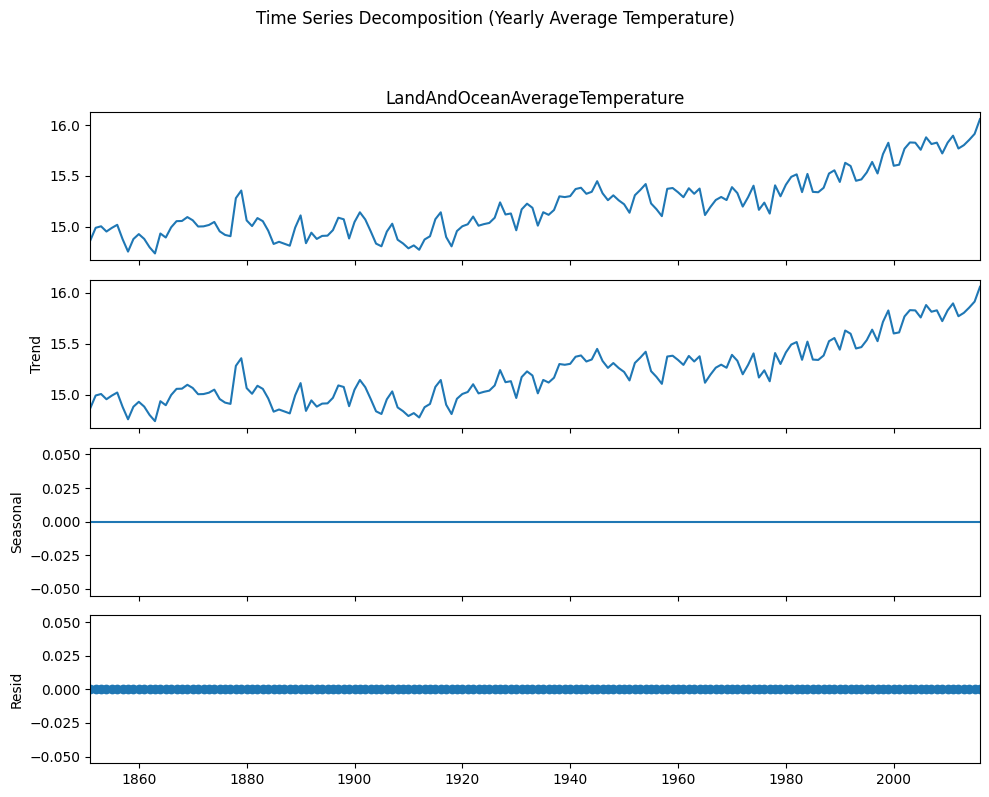


Time Series Decomposition Plot Generated.


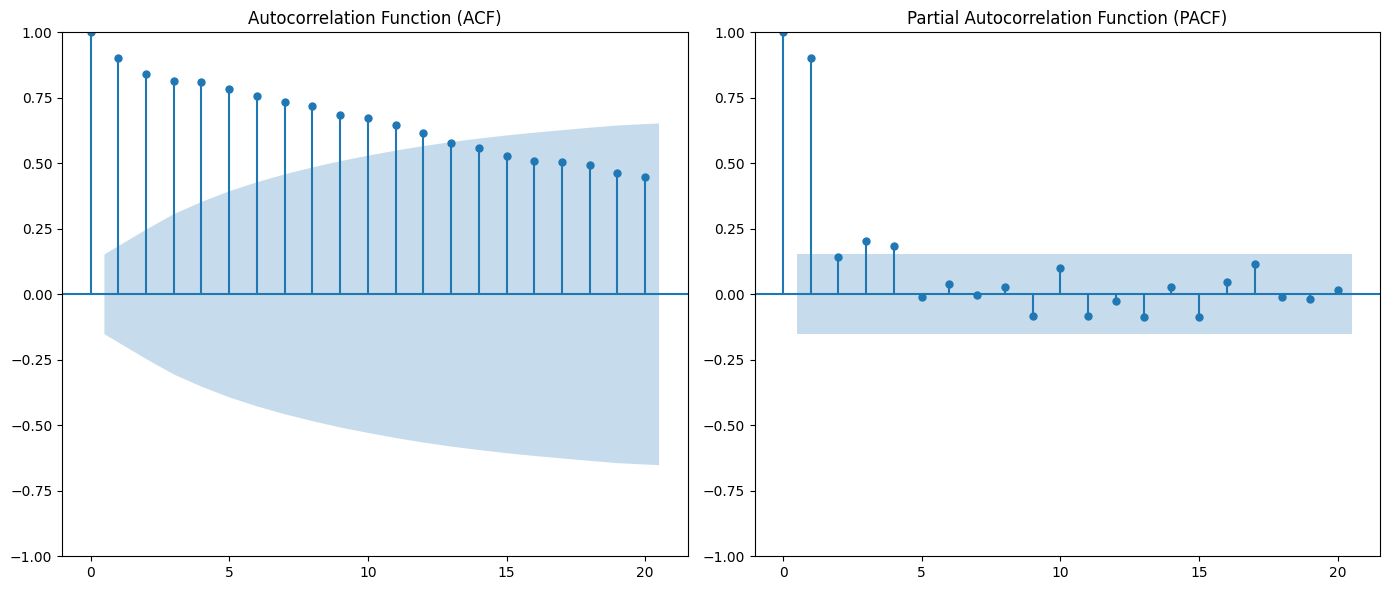


ACF and PACF Plots Generated.

Performing Augmented Dickey-Fuller Test for Stationarity:
ADF Statistic: 1.130564
p-value: 0.995469
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577
The series is likely non-stationary (fail to reject H0).
Consider differencing the series if you plan to use ARIMA or similar models.

Time series analysis complete. The plots and test results provide insights into the temperature trend, its components, and temporal correlations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller # For stationarity test
from datetime import timedelta

# --- 1. Load the Dataset ---
# Assuming 'GlobalTemperatures.csv' is in your Colab environment or mounted Google Drive
try:
    df = pd.read_csv('GlobalTemperatures.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'GlobalTemperatures.csv' not found. Please ensure it's uploaded or mounted.")
    exit() # Exit if file not found

# --- 2. Data Preprocessing ---
# Convert 'dt' column to datetime objects
df['dt'] = pd.to_datetime(df['dt'])

# Set 'dt' as the index
df.set_index('dt', inplace=True)

# Drop rows with missing values (e.g., in 'LandAndOceanAverageTemperature')
df.dropna(subset=['LandAndOceanAverageTemperature'], inplace=True)

# Resample to yearly average temperature
# We'll use 'LandAndOceanAverageTemperature' for global trend
# 'mean()' aggregates the monthly temperatures to yearly averages
yearly_temp = df['LandAndOceanAverageTemperature'].resample('Y').mean()

# Convert yearly_temp Series to a DataFrame for easier handling and plotting
yearly_temp_df = yearly_temp.reset_index()
yearly_temp_df.columns = ['Year', 'Temperature']
yearly_temp_df['Year_Numeric'] = yearly_temp_df['Year'].apply(lambda x: x.year)

print("\nProcessed Yearly Data Head:")
print(yearly_temp_df.head())
print("\nProcessed Yearly Data Tail:")
print(yearly_temp_df.tail())

# --- 3. Plotting the Raw Time Series ---
plt.figure(figsize=(12, 6))
plt.plot(yearly_temp_df['Year_Numeric'], yearly_temp_df['Temperature'], label='Yearly Average Temperature', color='blue')
plt.title('Global Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
print("\nRaw Time Series Plot Generated.")


# --- 4. Time Series Analysis: Decomposition ---
# Seasonal decomposition helps to break down the time series into
# trend, seasonal, and residual components.
# For yearly data, seasonality might not be prominent unless there's a multi-year cycle.
# We'll use 'additive' model as temperature increases are often additive.
# period=1 for yearly data if no strong multi-year seasonality is expected.
try:
    # Ensure the series is long enough for decomposition with the chosen period
    # If period=1, it essentially just extracts the trend and residuals.
    # If you had monthly data, period=12 would capture yearly seasonality.
    decomposition = seasonal_decompose(yearly_temp, model='additive', period=1)
    fig = decomposition.plot()
    fig.set_size_inches(10, 8)
    fig.suptitle('Time Series Decomposition (Yearly Average Temperature)', y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
    plt.show()
    print("\nTime Series Decomposition Plot Generated.")
except Exception as e:
    print(f"Could not perform seasonal decomposition: {e}")
    print("This might happen if the series is too short or period is inappropriate. For yearly data, a period of 1 is common.")


# --- 5. Time Series Analysis: Autocorrelation and Partial Autocorrelation ---
# ACF (Autocorrelation Function) shows the correlation of a time series with its own lagged values.
# PACF (Partial Autocorrelation Function) shows the correlation of a time series with its own lagged values,
# but with the linear dependence of the intervening lags removed.
# These plots are crucial for identifying the order of AR (p) and MA (q) terms in ARIMA models.

plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(yearly_temp, lags=20, ax=plt.gca(), title='Autocorrelation Function (ACF)')
plt.subplot(122)
plot_pacf(yearly_temp, lags=20, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()
print("\nACF and PACF Plots Generated.")

# --- 6. Stationarity Test (Augmented Dickey-Fuller Test) ---
# A stationary time series has constant mean, variance, and autocorrelation over time.
# Many time series models (like ARIMA) assume stationarity.
# If p-value > 0.05, it's typically considered non-stationary.
# Differencing can often make a non-stationary series stationary.
print("\nPerforming Augmented Dickey-Fuller Test for Stationarity:")
result = adfuller(yearly_temp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The series is likely stationary (reject H0).")
else:
    print("The series is likely non-stationary (fail to reject H0).")
    print("Consider differencing the series if you plan to use ARIMA or similar models.")

print("\nTime series analysis complete. The plots and test results provide insights into the temperature trend, its components, and temporal correlations.")


# **Global Temperature Regression Decision Tree**

Dataset loaded successfully.

Processed Yearly Data Head:
   Year  Temperature
0  1850    14.867167
1  1851    14.991833
2  1852    15.006500
3  1853    14.955167
4  1854    14.991000

Processed Yearly Data Tail:
     Year  Temperature
161  2011    15.769500
162  2012    15.802333
163  2013    15.854417
164  2014    15.913000
165  2015    16.058583

Training data shape: (132, 1), (132,)
Testing data shape: (34, 1), (34,)

Decision Tree Regressor trained successfully.

Model Evaluation:
Training Mean Squared Error (MSE): 0.0062
Training R-squared (R2): 0.9360
Testing Mean Squared Error (MSE): 0.0100
Testing R-squared (R2): 0.8233


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



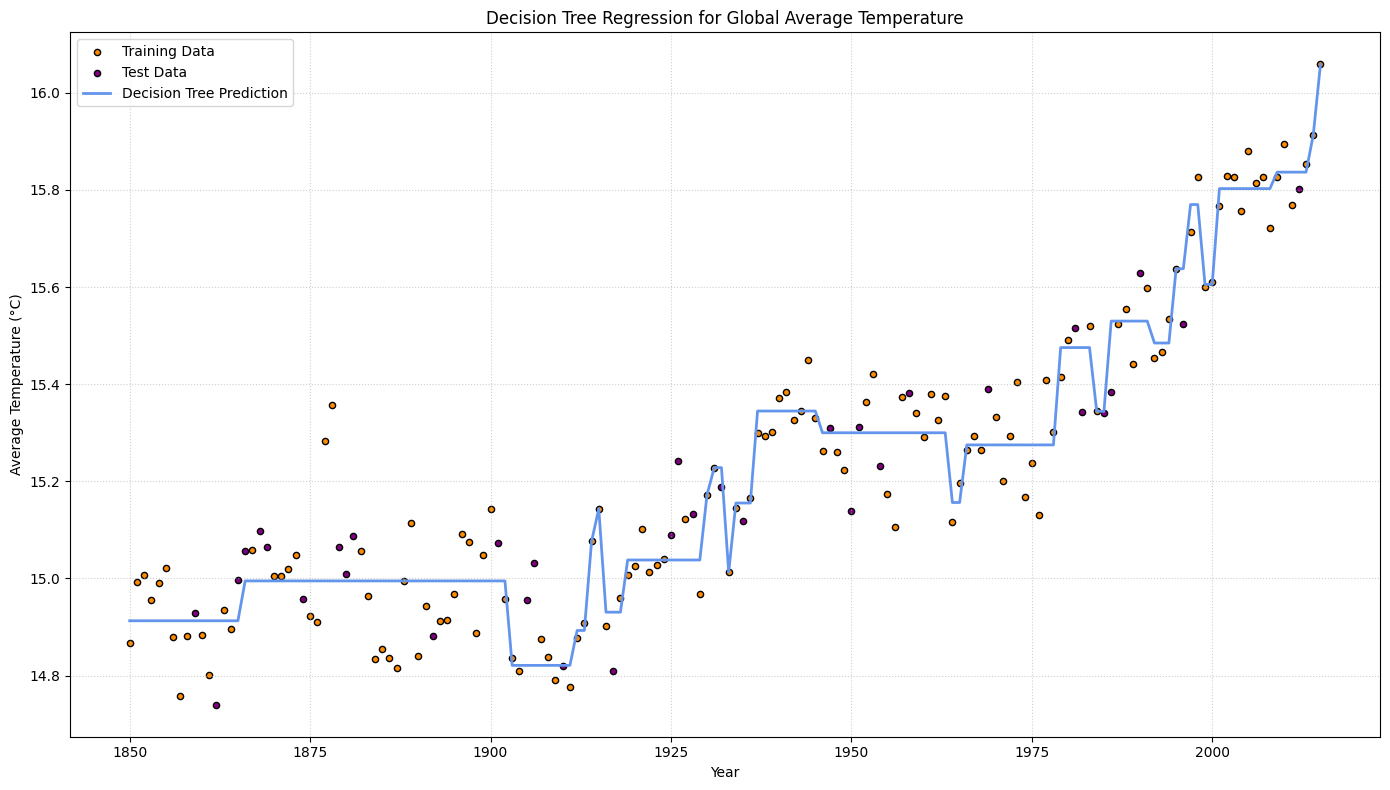


Decision Tree Regression plot generated, showing historical data and the model's prediction.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Load the Dataset ---
try:
    df = pd.read_csv('GlobalTemperatures.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'GlobalTemperatures.csv' not found. Please ensure it's uploaded or mounted.")
    exit()

# --- 2. Data Preprocessing ---
# Convert 'dt' column to datetime objects
df['dt'] = pd.to_datetime(df['dt'])

# Extract the year as a numerical feature
df['Year'] = df['dt'].apply(lambda x: x.year)

# Drop rows with missing values in the target variable
df.dropna(subset=['LandAndOceanAverageTemperature'], inplace=True)

# Aggregate to yearly average temperature for a cleaner trend
# This helps simplify the problem for demonstration purposes,
# as monthly variations can make a simple tree very complex.
yearly_temp_df = df.groupby('Year')['LandAndOceanAverageTemperature'].mean().reset_index()
yearly_temp_df.columns = ['Year', 'Temperature']

print("\nProcessed Yearly Data Head:")
print(yearly_temp_df.head())
print("\nProcessed Yearly Data Tail:")
print(yearly_temp_df.tail())

# --- 3. Define Features (X) and Target (y) ---
# We'll use 'Year' as our feature to predict 'Temperature'
X = yearly_temp_df[['Year']] # Features must be a 2D array
y = yearly_temp_df['Temperature'] # Target variable

# --- 4. Split Data into Training and Testing Sets ---
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

# --- 5. Train a Regression Decision Tree Model ---
# max_depth controls the complexity of the tree. A smaller depth prevents overfitting.
# random_state for reproducibility.
regressor = DecisionTreeRegressor(max_depth=5, random_state=42) # You can adjust max_depth
regressor.fit(X_train, y_train)

print("\nDecision Tree Regressor trained successfully.")

# --- 6. Make Predictions ---
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Predict across the entire range of years for plotting the decision tree's output
# Create a sorted array of all unique years in the dataset
X_plot = np.sort(yearly_temp_df['Year'].unique()).reshape(-1, 1)
y_plot_pred = regressor.predict(X_plot)

# --- 7. Evaluate the Model ---
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"\nModel Evaluation:")
print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Training R-squared (R2): {train_r2:.4f}")
print(f"Testing Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Testing R-squared (R2): {test_r2:.4f}")

# --- 8. Visualize the Results ---
plt.figure(figsize=(14, 8))
plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="Training Data")
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="purple", label="Test Data")
plt.plot(X_plot, y_plot_pred, color="cornflowerblue", linewidth=2, label="Decision Tree Prediction")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Decision Tree Regression for Global Average Temperature")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

print("\nDecision Tree Regression plot generated, showing historical data and the model's prediction.")

# --- Optional: Visualize the Decision Tree Structure (for smaller trees) ---
# If max_depth is large, this plot can be very complex and unreadable.
# plt.figure(figsize=(20, 10))
# plot_tree(regressor, feature_names=['Year'], filled=True, rounded=True, fontsize=10)
# plt.title("Decision Tree Regressor Structure")
# plt.show()
